C:\Users\HP\AppData\Local\Temp\ipykernel_1576\3679131039.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.pheromones[tour[i],tour[i+1]] += pheromone_deposit
C:\Users\HP\AppData\Local\Temp\ipykernel_1576\3679131039.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.pheromones[tour[i+1],tour[i]] += pheromone_deposit
C:\Users\HP\AppData\Local\Temp\ipykernel_1576\3679131039.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.pheromones[tour[-1],to

Nest Path [0, 3, 2, 1, 4] Best Length : [170]


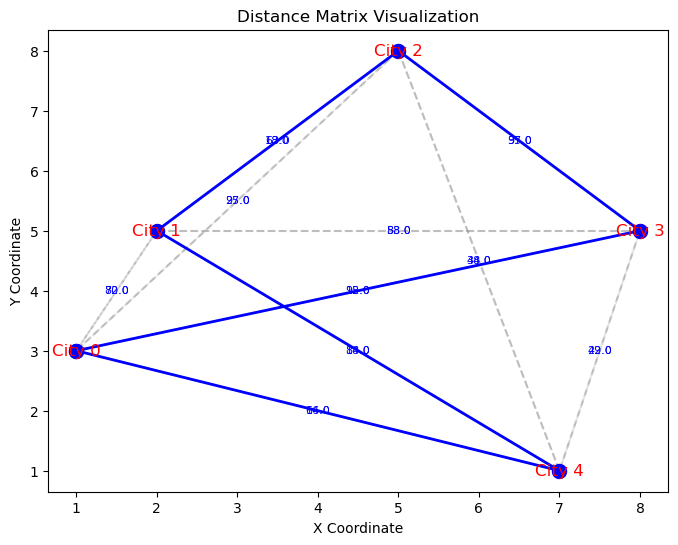

In [2]:
import numpy as np
from matplotlib import pyplot as plt

class ACOTSP:
    def __init__(self,num_cities,num_ants,max_iter,alpha=3,beta=5,evaporation_rate=0.6,Q=10):
        self.num_cities = num_cities
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.Q = Q
        self.max_iter = max_iter

        self.distance = np.random.randint(10,100,(self.num_cities,self.num_cities))
        self.pheromones = np.ones((self.num_cities,self.num_cities))
        self.starting_cities = np.random.choice(self.num_cities,self.num_ants,replace=True)

        self.best_length = float('inf')
        self.best_tour = None
    
    def select_next_city(self,current_city,visited,pheromones,distances):
        probabilites = []
        for city in range(self.num_cities):
            if city not in visited:
                pheromone_level = pheromones[current_city,city] ** self.alpha
                visibility = (1 / distances[current_city,city]) ** self.beta
                probabilites.append(pheromone_level * visibility)
            else:
                probabilites.append(0)
        
        probabilites = np.array(probabilites) / sum(probabilites)
        return np.random.choice(self.num_cities,p=probabilites)
    
    def tour_length(self,tour,distances):
        length = sum(distances[tour[i],tour[i+1]] for i in range(len(tour)-1))
        length += distances[tour[-1],[tour[0]]]
        return length
    
    def run(self):
        for _ in range(self.max_iter):
            tours = []
            for ant in range(self.num_ants):
                current_city = self.starting_cities[ant]
                tour = [current_city]
                visited = {current_city}

                while len(tour) < self.num_cities:
                    next_city = self.select_next_city(current_city,visited,self.pheromones,self.distance)
                    visited.add(next_city)
                    tour.append(next_city)
                    current_city = next_city
                
                tours.append(tour)
            
            self.pheromones *= (1-self.evaporation_rate)

            for tour in tours:
                length = self.tour_length(tour,self.distance)
                pheromone_deposit = self.Q / length

                for i in range(len(tour) -1):
                    self.pheromones[tour[i],tour[i+1]] += pheromone_deposit
                    self.pheromones[tour[i+1],tour[i]] += pheromone_deposit
                self.pheromones[tour[-1],tour[0]] += pheromone_deposit
                self.pheromones[tour[0],tour[-1]] += pheromone_deposit
            
                if length < self.best_length:
                    self.best_length = length
                    self.best_tour = tour

        return self.best_tour, self.best_length
    
def plot_distance_matrix(city_positions, distance_matrix,best_path):
    plt.figure(figsize=(8, 6))
    for i, (x1, y1) in city_positions.items():
        for j, (x2, y2) in city_positions.items():
            if i != j:
                plt.plot([x1, x2], [y1, y2], 'gray', linestyle='--', alpha=0.3)
                plt.text((x1 + x2) / 2, (y1 + y2) / 2, f"{distance_matrix[i][j]:.1f}",
                         ha='center', va='center', fontsize=8, color='blue')

    for city, (x, y) in city_positions.items():
        plt.scatter(x, y, s=100)
        plt.text(x, y, f"City {city}", ha='center', va='center', fontsize=12, color='red')

    path_x = [city_positions[city][0] for city in best_path]
    path_y = [city_positions[city][1] for city in best_path]
    path_x.append(path_x[0])  
    path_y.append(path_y[0])
    plt.plot(path_x, path_y, 'b-', marker='o', markersize=10, linewidth=2)

    plt.title("Distance Matrix Visualization")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

city_positions = {
    0: (1, 3),
    1: (2, 5),
    2: (5, 8),
    3: (8, 5),
    4: (7, 1)
}
acotsp = ACOTSP(5,10,100)
best_tour, best_length = acotsp.run()
print(f"Nest Path {best_tour} Best Length : {best_length}")
plot_distance_matrix(city_positions,acotsp.distance,acotsp.best_tour)


([2, 0, 1, 4, 3], 222)
